# Chapter 4

04_BayesUpdate.py  
Bayesian updating of beliefs about the bias of a coin. The prior and posterior
distributions indicate probability masses at discrete candidate values of theta.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
n_theta_vals = 3.

# Now make the vector of theta values:
theta = np.linspace(1/(n_theta_vals +1), n_theta_vals /(n_theta_vals +1), n_theta_vals )

/home/james/Programs/anaconda3/envs/py36-Bayes/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


In [5]:
theta

array([ 0.25,  0.5 ,  0.75])

In [22]:
# p_theta is the vector of prior probabilities on the theta values.
p_theta = np.minimum(theta, 1-theta)  # Makes a triangular belief distribution.
p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1.

In [23]:
p_theta

array([ 0.25,  0.5 ,  0.25])

In [24]:
data = np.repeat([1, 0], [3, 9])
n_heads = np.sum(data)
n_tails = len(data) - n_heads

In [9]:
data

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
# Compute the likelihood of the data for each value of theta:
p_data_given_theta = theta**n_heads * (1-theta)**n_tails

In [18]:
# Compute the posterior:
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data   # This is Bayes' rule!

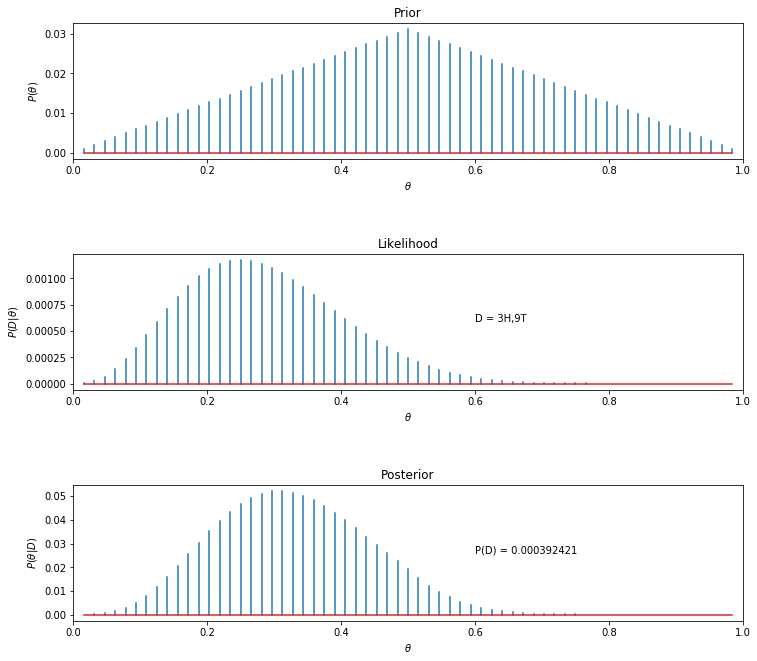

In [19]:
# Plot the results.
plt.figure(figsize=(12, 11))
plt.subplots_adjust(hspace=0.7)

# Plot the prior:
plt.subplot(3, 1, 1)
plt.stem(theta, p_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta)$')
plt.title('Prior')

# Plot the likelihood:
plt.subplot(3, 1, 2)
plt.stem(theta, p_data_given_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(D|\\theta)$')
plt.title('Likelihood')
plt.text(0.6, np.max(p_data_given_theta)/2, 'D = %sH,%sT' % (n_heads, n_tails))

# Plot the posterior:
plt.subplot(3, 1, 3)
plt.stem(theta, p_theta_given_data, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta|D)$')
plt.title('Posterior')
plt.text(0.6, np.max(p_theta_given_data)/2, 'P(D) = %g' % p_data)
plt.show()